In [106]:
import pandas as pd

In [107]:
df_houseindia = pd.read_csv("HouseIndia.csv")
df_houseindia.head()

,Area,BHK,Age,City,State,Price (INR)
0,2500,3,10,Mumbai,Maharashtra,"6,00,000"
1,2800,4,8,Pune,Maharashtra,"7,50,000"
2,3200,4,5,Nagpur,Maharashtra,"9,00,000"
3,3000,3,15,Noida,Uttar Pradesh,"5,50,000"
4,3500,4,12,Lucknow,Uttar Pradesh,"8,00,000"


In [108]:
df_houseindia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117 entries, 0 to 116
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Area         117 non-null    int64 
 1   BHK          117 non-null    int64 
 2   Age          117 non-null    int64 
 3   City         117 non-null    object
 4   State        117 non-null    object
 5   Price (INR)  117 non-null    object
dtypes: int64(3), object(3)
memory usage: 5.6+ KB


In [109]:
import seaborn as sns

In [110]:
df_houseindia['Price_numeric'] = pd.to_numeric(df_houseindia['Price (INR)'].str.replace(',', ''))

In [111]:
df_houseindia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117 entries, 0 to 116
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Area           117 non-null    int64 
 1   BHK            117 non-null    int64 
 2   Age            117 non-null    int64 
 3   City           117 non-null    object
 4   State          117 non-null    object
 5   Price (INR)    117 non-null    object
 6   Price_numeric  117 non-null    int64 
dtypes: int64(4), object(3)
memory usage: 6.5+ KB


c:\Users\pdeepak\AppData\Local\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


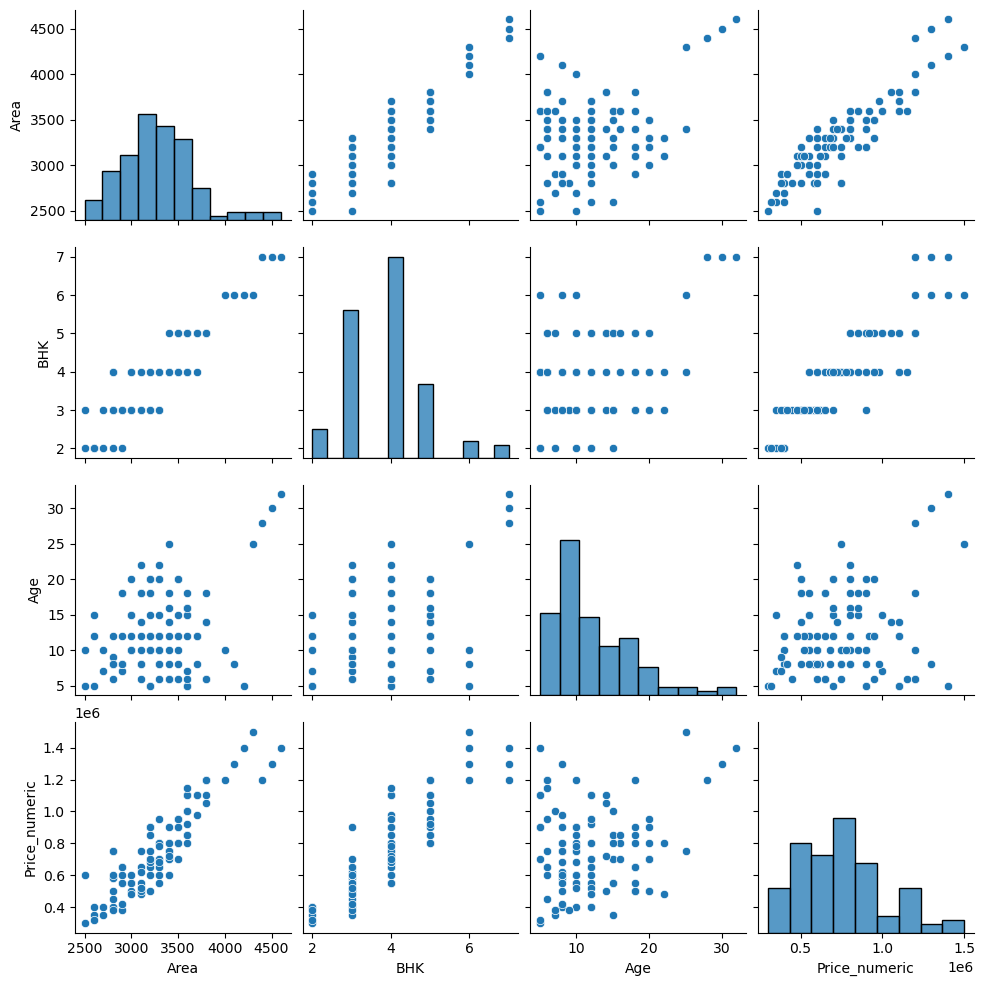

In [112]:
sns.pairplot(data=df_houseindia)

In [113]:
x_data = df_houseindia[['Area', 'BHK', 'Age',]]
y_data = df_houseindia['Price_numeric']

In [114]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=42)

In [115]:
# print("Size of df_houseindia:", len(df_houseindia))
# print("Size of df_real_estate:", len(df_real_estate))
print("Size of x_test:", x_test.shape)
print("Size of x_train:", x_train.shape)
print("Size of y_test:", y_test.shape)
print("Size of y_train:", y_train.shape)

Size of x_test: (24, 3)
Size of x_train: (93, 3)
Size of y_test: (24,)
Size of y_train: (93,)


In [116]:
from sklearn.linear_model import LinearRegression

# Create an instance of the LinearRegression model
model = LinearRegression()

# Fit the model to the training data
model.fit(x_train, y_train)

LinearRegression()

In [117]:
# Calculate the accuracy of the model
accuracy = model.score(x_test, y_test)
print("Accuracy:", accuracy)

# Make predictions
predictions = model.predict(x_test)
print("Predictions:", predictions)

Accuracy: 0.8529182879194082
Predictions: [1385147.85681084  849161.56488968  938942.54214692 1251601.3132645
  582522.31871575  712911.33574555  512143.24548913  824348.17568796
  957894.7192343   479207.66753037 1295816.60649683  586583.41309427
 1043614.60211302  979550.58191947  770660.30290601  379954.11072352
 1015643.68639477  795473.69210773  522519.39290072  957894.7192343
  745846.9137043   892473.29026003  799534.78648625  667345.65172064]


In [118]:
comparison_df = pd.DataFrame({'Actual Price': y_test.astype(int), 'Predicted Price': predictions.astype(int)})
comparison_df

,Actual Price,Predicted Price
44,1300000,1385147
4,800000,849161
53,1100000,938942
42,1500000,1251601
10,500000,582522
85,700000,712911
72,400000,512143
94,750000,824348
36,1000000,957894
11,650000,479207


In [119]:
from sklearn.preprocessing import LabelEncoder

# Create an instance of LabelEncoder
label_encoder = LabelEncoder()


# Encode the 'City' column
df_houseindia['City_encoded'] = label_encoder.fit_transform(df_houseindia['City'])

# Encode the 'State' column
df_houseindia['State_encoded'] = label_encoder.fit_transform(df_houseindia['State'])

# Print the updated dataframe
df_houseindia.head()

,Area,BHK,Age,City,State,Price (INR),Price_numeric,City_encoded,State_encoded
0,2500,3,10,Mumbai,Maharashtra,"6,00,000",600000,35,8
1,2800,4,8,Pune,Maharashtra,"7,50,000",750000,42,8
2,3200,4,5,Nagpur,Maharashtra,"9,00,000",900000,37,8
3,3000,3,15,Noida,Uttar Pradesh,"5,50,000",550000,40,20
4,3500,4,12,Lucknow,Uttar Pradesh,"8,00,000",800000,32,20


In [120]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Combine the x_data with the City_encoded and State_encoded columns
x_data_encoded = pd.concat([x_data, df_houseindia[['City_encoded', 'State_encoded']]], axis=1)

# Split the data into training and testing sets
x_train_encoded, x_test_encoded, y_train, y_test = train_test_split(x_data_encoded, y_data, test_size=0.2, random_state=42)

# Create an instance of the LinearRegression model
model_encoded = LinearRegression()

# Fit the model to the training data
model_encoded.fit(x_train_encoded, y_train)

LinearRegression()

In [121]:
# Calculate the accuracy of the encoded model
accuracy_encoded = model_encoded.score(x_test_encoded, y_test)
print("Accuracy (Encoded Model):", accuracy_encoded)

# Make predictions using the encoded model
predictions_encoded = model_encoded.predict(x_test_encoded)
print("Predictions (Encoded Model):", predictions_encoded)

Accuracy (Encoded Model): 0.8804586532227717
Predictions (Encoded Model): [1381403.25757554  812261.48100532  954460.1868116  1330358.62567513
  555431.77498281  672050.59124291  490162.17068592  792091.68330865
  976878.71324668  460465.34916166 1316499.51864962  619811.95621175
 1016666.35447387  965000.03507818  826383.01156894  400659.40464364
  982672.74950654  799824.53650454  544208.8679869   948002.83694882
  775075.25628324  913857.39629376  798500.11998946  618976.60311685]


In [122]:
comparison_df_encoded = pd.DataFrame({'Actual Price': y_test.astype(int), 'Predicted Price': predictions_encoded.astype(int)})
comparison_df_encoded

,Actual Price,Predicted Price
44,1300000,1381403
4,800000,812261
53,1100000,954460
42,1500000,1330358
10,500000,555431
85,700000,672050
72,400000,490162
94,750000,792091
36,1000000,976878
11,650000,460465


In [123]:
df_houseindia_encoded = pd.get_dummies(df_houseindia, columns=['City', 'State'], drop_first=True)
df_houseindia_encoded.head()

,Area,BHK,Age,Price (INR),Price_numeric,City_encoded,State_encoded,City_Ahmedabad,City_Aizawl,City_Bangalore,...,State_Odisha,State_Punjab,State_Rajasthan,State_Sikkim,State_Tamil Nadu,State_Telangana,State_Tripura,State_Uttar Pradesh,State_Uttarakhand,State_West Bengal
0,2500,3,10,"6,00,000",600000,35,8,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2800,4,8,"7,50,000",750000,42,8,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,3200,4,5,"9,00,000",900000,37,8,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,3000,3,15,"5,50,000",550000,40,20,False,False,False,...,False,False,False,False,False,False,False,True,False,False
4,3500,4,12,"8,00,000",800000,32,20,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [124]:
df_houseindia_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117 entries, 0 to 116
Data columns (total 80 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Area                     117 non-null    int64 
 1   BHK                      117 non-null    int64 
 2   Age                      117 non-null    int64 
 3   Price (INR)              117 non-null    object
 4   Price_numeric            117 non-null    int64 
 5   City_encoded             117 non-null    int32 
 6   State_encoded            117 non-null    int32 
 7   City_Ahmedabad           117 non-null    bool  
 8   City_Aizawl              117 non-null    bool  
 9   City_Bangalore           117 non-null    bool  
 10  City_Berhampur           117 non-null    bool  
 11  City_Bhubaneswar         117 non-null    bool  
 12  City_Chandigarh          117 non-null    bool  
 13  City_Chennai             117 non-null    bool  
 14  City_Coimbatore          117 non-null    b

In [125]:
df_houseindia_encoded[['City_Ahmedabad', 'City_Aizawl', 'City_Bangalore', 'City_Berhampur', 'City_Bhubaneswar', 'City_Chandigarh', 'City_Chennai', 'City_Coimbatore', 'City_Cuttack', 'City_Dehradun', 'City_Delhi', 'City_Dharmanagar', 'City_Dibrugarh', 'City_Dimapur', 'City_Dispur', 'City_Durgapur', 'City_Gangtok', 'City_Gaya', 'City_Ghaziabad', 'City_Guwahati', 'City_Haridwar', 'City_Hyderabad', 'City_Imphal', 'City_Itanagar', 'City_Jaipur', 'City_Jamshedpur', 'City_Jodhpur', 'City_Kochi', 'City_Kohima', 'City_Kolkata', 'City_Kozhikode', 'City_Lucknow', 'City_Madurai', 'City_Mangalore', 'City_Mumbai', 'City_Mysore', 'City_Nagpur', 'City_Naharlagun', 'City_Nainital', 'City_Noida', 'City_Patna', 'City_Pune', 'City_Puri', 'City_Ranchi', 'City_Rourkela', 'City_Sambalpur', 'City_Shillong', 'City_Siliguri', 'City_Thiruvananthapuram', 'City_Tura', 'City_Udaipur', 'State_Assam', 'State_Bihar', 'State_Delhi', 'State_Gujarat', 'State_Jharkhand', 'State_Karnataka', 'State_Kerala', 'State_Maharashtra', 'State_Manipur', 'State_Meghalaya', 'State_Mizoram', 'State_Nagaland', 'State_Odisha', 'State_Punjab', 'State_Rajasthan', 'State_Sikkim', 'State_Tamil Nadu', 'State_Telangana', 'State_Tripura', 'State_Uttar Pradesh', 'State_Uttarakhand', 'State_West Bengal']] = df_houseindia_encoded[['City_Ahmedabad', 'City_Aizawl', 'City_Bangalore', 'City_Berhampur', 'City_Bhubaneswar', 'City_Chandigarh', 'City_Chennai', 'City_Coimbatore', 'City_Cuttack', 'City_Dehradun', 'City_Delhi', 'City_Dharmanagar', 'City_Dibrugarh', 'City_Dimapur', 'City_Dispur', 'City_Durgapur', 'City_Gangtok', 'City_Gaya', 'City_Ghaziabad', 'City_Guwahati', 'City_Haridwar', 'City_Hyderabad', 'City_Imphal', 'City_Itanagar', 'City_Jaipur', 'City_Jamshedpur', 'City_Jodhpur', 'City_Kochi', 'City_Kohima', 'City_Kolkata', 'City_Kozhikode', 'City_Lucknow', 'City_Madurai', 'City_Mangalore', 'City_Mumbai', 'City_Mysore', 'City_Nagpur', 'City_Naharlagun', 'City_Nainital', 'City_Noida', 'City_Patna', 'City_Pune', 'City_Puri', 'City_Ranchi', 'City_Rourkela', 'City_Sambalpur', 'City_Shillong', 'City_Siliguri', 'City_Thiruvananthapuram', 'City_Tura', 'City_Udaipur', 'State_Assam', 'State_Bihar', 'State_Delhi', 'State_Gujarat', 'State_Jharkhand', 'State_Karnataka', 'State_Kerala', 'State_Maharashtra', 'State_Manipur', 'State_Meghalaya', 'State_Mizoram', 'State_Nagaland', 'State_Odisha', 'State_Punjab', 'State_Rajasthan', 'State_Sikkim', 'State_Tamil Nadu', 'State_Telangana', 'State_Tripura', 'State_Uttar Pradesh', 'State_Uttarakhand', 'State_West Bengal']].astype(int)

In [126]:
df_houseindia_encoded.head()

,Area,BHK,Age,Price (INR),Price_numeric,City_encoded,State_encoded,City_Ahmedabad,City_Aizawl,City_Bangalore,...,State_Odisha,State_Punjab,State_Rajasthan,State_Sikkim,State_Tamil Nadu,State_Telangana,State_Tripura,State_Uttar Pradesh,State_Uttarakhand,State_West Bengal
0,2500,3,10,"6,00,000",600000,35,8,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2800,4,8,"7,50,000",750000,42,8,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3200,4,5,"9,00,000",900000,37,8,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3000,3,15,"5,50,000",550000,40,20,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,3500,4,12,"8,00,000",800000,32,20,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [127]:
x_data_encoded_1 = df_houseindia_encoded.drop(['Price (INR)','Price_numeric', 'City_encoded', 'State_encoded'], axis=1)
y_data_1 = df_houseindia_encoded['Price_numeric']

In [128]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_data_encoded_1, y_data_1, test_size=0.2, random_state=42)

In [129]:
print("Shape of x_train:", x_train.shape)
print("Shape of x_test:", x_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of x_train: (93, 76)
Shape of x_test: (24, 76)
Shape of y_train: (93,)
Shape of y_test: (24,)


In [130]:
from sklearn.linear_model import LinearRegression

# Create an instance of the LinearRegression model
model = LinearRegression()

# Fit the model to the data
model.fit(x_train, y_train)

LinearRegression()

In [131]:
print("Accuracy:", accuracy)
predictions = model.predict(x_test)
print("Predictions:", predictions)

Accuracy: 0.8529182879194082
Predictions: [1344573.94010603  882737.45247075 1085648.7874855  1332256.52952094
  596231.67505738  659967.84534709  404428.57690966  820766.62864215
  974143.37338205  485716.20790702 1272313.2156908   529227.06682884
 1079100.69382942  931833.08348293  731880.47643157  457896.04830327
 1033892.35450502  791258.38804472  607039.40053684  929670.83372132
  766741.18124086  954063.89669031  739662.19566579  570925.13059419]


In [132]:
from sklearn.linear_model import BayesianRidge

# Create an instance of the BayesianRidge model
model_bayesian = BayesianRidge()

# Fit the model to the training data
model_bayesian.fit(x_train, y_train)

BayesianRidge()

In [133]:
# Predict the test data
predictions = model_bayesian.predict(x_test)

# Calculate the accuracy
accuracy = model_bayesian.score(x_test, y_test)

# Print the predictions and accuracy
print("Predictions:", predictions)
print("Accuracy:", accuracy)

Predictions: [1395276.39712271  869178.26350813 1061065.00962317 1281583.91697105
  589813.84771657  666420.31527206  442664.05548571  818902.62210797
  959431.76140449  475227.99510039 1285140.33628406  571044.44299484
 1048910.76855873  925122.1918876   751402.3977404   436753.43808969
  995499.4579413   783820.39221891  593274.88216133  905471.82437466
  735234.51360295  947869.08093999  767661.5888893   596718.14965664]
Accuracy: 0.9094331399918053


In [134]:
from sklearn.ensemble import RandomForestRegressor

# Create an instance of the RandomForestRegressor model
model_random_forest = RandomForestRegressor()

# Fit the model to the training data
model_random_forest.fit(x_train, y_train)

RandomForestRegressor()

In [135]:
# Predict the test data
predictions_rf = model_random_forest.predict(x_test)

# Calculate the accuracy
accuracy_rf = model_random_forest.score(x_test, y_test)

# Print the predictions and accuracy
print("Predictions (Random Forest):", predictions_rf)
print("Accuracy (Random Forest):", accuracy_rf)

Predictions (Random Forest): [1231000.  840500. 1083000. 1227500.  681300.  716300.  466100.  783700.
  913500.  534800. 1212600.  523700. 1161000.  961800.  734400.  470000.
  998300.  814500.  573700.  899500.  759200.  909500.  760400.  632200.]
Accuracy (Random Forest): 0.8858921549046733


In [136]:
from xgboost import XGBRegressor

# Create an instance of the XGBRegressor model
# model_xgb = XGBRegressor()
model_xgb =  XGBRegressor(n_estimators=500,
                    learning_rate=0.5)

# Fit the model to the training data
model_xgb.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.5, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=500, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [137]:
# Predict the test data
predictions_xgb = model_xgb.predict(x_test)

# Calculate the accuracy
accuracy_xgb = model_xgb.score(x_test, y_test)

# Print the predictions and accuracy
print("Predictions (XGBRegressor):", predictions_xgb)
print("Accuracy (XGBRegressor):", accuracy_xgb)

Predictions (XGBRegressor): [1204915.2   809684.94 1181775.5  1354921.8   660661.9   678176.2
  383971.03  777996.6   921199.6   588540.3  1199824.5   506829.44
 1160368.5   936088.4   720756.    401889.94  944103.75  832694.4
  486532.12  949126.44  777499.8  1074689.4   782477.94  573893.1 ]
Accuracy (XGBRegressor): 0.8936660044566581


In [138]:
from sklearn.linear_model import Ridge

# Create an instance of the Ridge model
model_ridge = Ridge()

# Fit the model to the training data
model_ridge.fit(x_train, y_train)

Ridge()

In [139]:
# Predict the test data
predictions_ridge = model_ridge.predict(x_test)

# Calculate the accuracy
accuracy_ridge = model_ridge.score(x_test, y_test)

# Print the predictions and accuracy
print("Predictions (Ridge):", predictions_ridge)
print("Accuracy (Ridge):", accuracy_ridge)

Predictions (Ridge): [1393130.12551902  874929.81057435 1076043.24507829 1293185.0977091
  588299.04616522  660902.70368741  425539.20170762  818324.52456184
  965803.82390216  479007.54891681 1280614.49642379  554198.64900652
 1055798.39419114  919871.03403699  742527.92297985  453556.67977495
 1008165.08795693  784430.37111071  602509.35828463  907487.53770496
  743924.64234848  949479.08031281  757875.81081342  590379.39258055]
Accuracy (Ridge): 0.9190289721461005


In [140]:
from sklearn.linear_model import Lasso

# Create an instance of the Lasso model
model_lasso = Lasso()

# Fit the model to the training data
model_lasso.fit(x_train, y_train)

# Predict the test data
predictions_lasso = model_lasso.predict(x_test)

# Calculate the accuracy
accuracy_lasso = model_lasso.score(x_test, y_test)

# Print the predictions and accuracy
print("Predictions (Lasso):", predictions_lasso)
print("Accuracy (Lasso):", accuracy_lasso)

Predictions (Lasso): [1287644.39427626  865764.54141619 1085682.25638681 1343569.67963436
  591854.47061572  659975.28814269  404476.96445469  820744.74414024
  985548.29341396  481340.96630318 1312084.05342908  566037.27454651
 1079024.55200633  931808.50614512  759485.7148498   457881.16645943
 1033821.94976132  791226.5996209   607027.82653585  929633.2728114
  766668.51649598  954084.54843596  768751.33279437  571005.63574662]
Accuracy (Lasso): 0.9304521163078042


c:\Users\pdeepak\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.794e+09, tolerance: 5.591e+08
  model = cd_fast.enet_coordinate_descent(


In [141]:
from sklearn.linear_model import ElasticNet

# Create an instance of the ElasticNet model
model_elasticnet = ElasticNet()

# Fit the model to the training data
model_elasticnet.fit(x_train, y_train)

# Predict the test data
predictions_elasticnet = model_elasticnet.predict(x_test)

# Print the predictions
print("Predictions (ElasticNet):", predictions_elasticnet)
# Calculate the accuracy for ElasticNet
accuracy_elasticnet = model_elasticnet.score(x_test, y_test)
print("Accuracy (ElasticNet):", accuracy_elasticnet)

Predictions (ElasticNet): [1373209.33427579  876149.26376457 1009961.86926012 1274289.03517552
  622127.29236399  695442.23944398  483107.06659273  831561.72524345
  933749.13723795  471009.79967162 1283532.87996503  612662.22600292
 1049143.47230606  946429.90253535  762081.16127995  334692.81796989
  979661.07161029  799112.30753693  540876.03186261  922514.51093907
  720891.14076626  936169.1197268   785753.9835668   600643.43038642]
Accuracy (ElasticNet): 0.8626643432343448


In [142]:
from sklearn.preprocessing import PolynomialFeatures

# Create an instance of the PolynomialFeatures model
poly_features = PolynomialFeatures(degree=1)

# Transform the features to polynomial features
x_train_poly = poly_features.fit_transform(x_train)
x_test_poly = poly_features.transform(x_test)

# Create a new instance of the LinearRegression model
model_poly = LinearRegression()

# Fit the model to the polynomial features
model_poly.fit(x_train_poly, y_train)

# Predict the test data using the polynomial features model
predictions_poly = model_poly.predict(x_test_poly)

# Calculate the accuracy of the polynomial features model
accuracy_poly = model_poly.score(x_test_poly, y_test)

# Print the predictions and accuracy
print("Predictions (PolynomialFeatures):", predictions_poly)
print("Accuracy (PolynomialFeatures):", accuracy_poly)

Predictions (PolynomialFeatures): [1344573.94010595  882737.45247075 1085648.78748544 1332256.52952085
  596231.67505738  659967.84534707  404428.57690969  820766.62864212
  974143.37338203  485716.20790708 1272313.21569084  529227.06682888
 1079100.69382935  931833.08348287  731880.47643174  457896.04830332
 1033892.35450498  791258.38804493  607039.40053684  929670.83372124
  766741.1812408   954063.89669023  739662.19566578  570925.13059419]
Accuracy (PolynomialFeatures): 0.931472727096555


In [143]:
comparison_df_poly = pd.DataFrame({'Actual Price': y_test.astype(int), 'Predicted Price': predictions_poly.astype(int)})
comparison_df_poly

,Actual Price,Predicted Price
44,1300000,1344573
4,800000,882737
53,1100000,1085648
42,1500000,1332256
10,500000,596231
85,700000,659967
72,400000,404428
94,750000,820766
36,1000000,974143
11,650000,485716


In [144]:
# create SVR model and predict the data and find accuracy
from sklearn.svm import SVR

# Create an instance of the SVR model
model_svr = SVR(degree=1,kernel='linear')

# Fit the model to the training data
model_svr.fit(x_train, y_train)

# Predict the test data
predictions_svr = model_svr.predict(x_test)

# Calculate the accuracy
accuracy_svr = model_svr.score(x_test, y_test)

# Print the predictions and accuracy
print("Predictions (SVR):", predictions_svr)
print("Accuracy (SVR):", accuracy_svr)

Predictions (SVR): [1441211.0245169   863575.77391791  922399.45468775 1325846.7338924
  688679.7252995   746657.76934997  458217.10228397  805840.12860565
  921205.41923017  514994.55138159 1211930.7167066   631422.03822074
 1037274.50733111  921564.09771603  747625.24531225  284065.41063727
  922158.45468774  805357.89062451  515725.34885802  921197.41923017
  689896.6         864303.57139435  748101.4832934   573929.07139434]
Accuracy (SVR): 0.825413905382396
